### SVM on MNIST
#### By Mimotrixz

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_mldata
from matplotlib.colors import Normalize

#### Read Dataset 

In [0]:
import warnings
warnings.filterwarnings("ignore")
mnist = fetch_mldata('MNIST original', data_home='./')
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

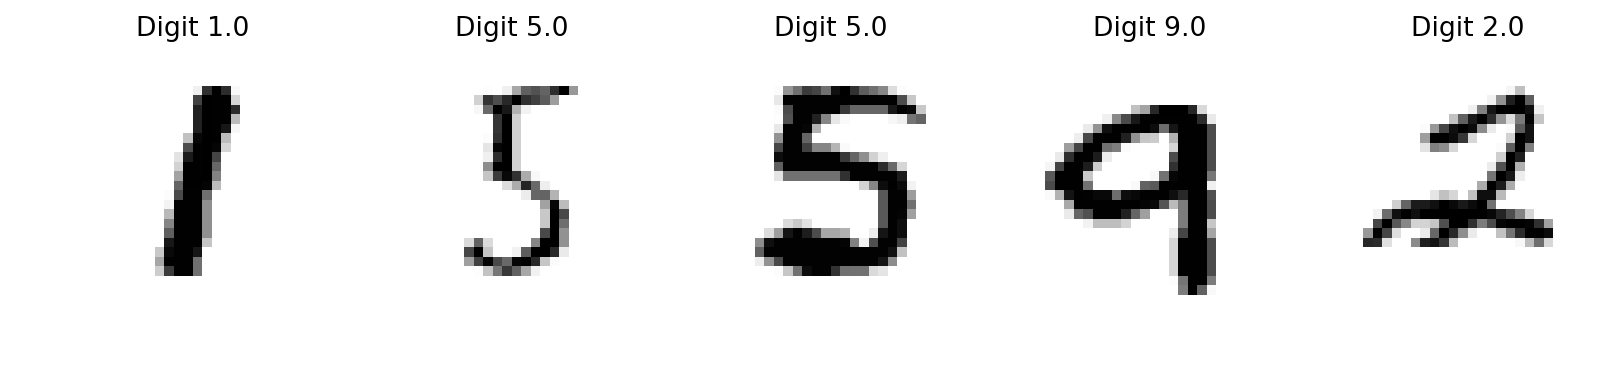

In [0]:
images = mnist.data
targets = mnist.target

def show_some_digits(images, targets, sample_size=24, title_text='Digit {}' ):
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0],nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))
    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(nsamples/6.0), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()

show_some_digits(images,targets,5)

#### Selecting 2 and 7 lables

In [0]:
twos = []
sevens = []
for items in range(len(targets)):
    if targets[items] == 2.0:
        twos.append(items)
    if targets[items] == 7.0:
        sevens.append(items)
all_needed_data = twos+sevens

train_data = []
train_label = []
for items in all_needed_data:
    train_data.append(images[items])
    train_label.append(targets[items])
    
print(len(train_data), len(train_label))

14283 14283


#### Splitting data

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# we keep 30% random examples for test
X_train, X_test, y_train, y_test = train_test_split(train_data,
train_label, test_size=0.3, random_state=101)

# we scale the data in the range [-1,1]
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)



#### Implementing HardMargin SVM

In [0]:
# from sklearn.svm import SVC
# svm = SVC(C = 0.1,kernel="rbf",gamma =1.5,shrinking=False,cache_size=3000)
# cv_performance = cross_val_score(svm, X_train, y_train,
# cv=5)
# test_performance = svm.fit(X_train, y_train).score(X_test,
# y_test)

# print ('Cross-validation accuracy score: %0.3f,'
# ' test accuracy score: %0.3f'% (np.mean(cv_performance),test_performance))

from sklearn.svm import SVC
svm = SVC(C=0.1)
cv_performance = cross_val_score(svm, X_train, y_train,
cv=5)
test_performance = svm.fit(X_train, y_train).score(X_test,
y_test)

print ('Cross-validation accuracy score: %0.3f,'
' test accuracy score: %0.3f'% (np.mean(cv_performance),test_performance))

Cross-validation accuracy score: 0.983, test accuracy score: 0.986


#### Implementing SoftMargin SVM with Cross Validation

In [0]:
from sklearn.svm import SVC
svm = SVC()
cv_performance = cross_val_score(svm, X_train, y_train,
cv=5)
test_performance = svm.fit(X_train, y_train).score(X_test,
y_test)

print ('Cross-validation accuracy score: %0.3f,'
' test accuracy score: %0.3f'% (np.mean(cv_performance),test_performance))

Cross-validation accuracy score: 0.990, test accuracy score: 0.990


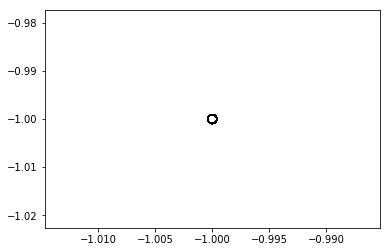

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
 
# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 109.1min finished


Best Parameters:
 {'C': 10, 'gamma': 0.01}
Best Estimators:
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
